# Обробка та аналіз БМД

Лабораторна робота №7

Виконав студент групи БС-81

Лукашевич Максим

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані.

In [40]:
import scipy.stats as ss
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
dat1 = [34, 31, 30, 36, 29, 30, 31, 35, 32, 33]
dat2 = [35, 35, 34, 34, 33, 33, 37, 38, 37, 38]
dataframe = pd.DataFrame({"Before":dat1, 
                          "After":dat2})

dataframe

,Before,After
0,34,35
1,31,35
2,30,34
3,36,34
4,29,33
5,30,33
6,31,37
7,35,38
8,32,37
9,33,38


2. Побудувати графік, що відображає розкид даних в групах.

[]

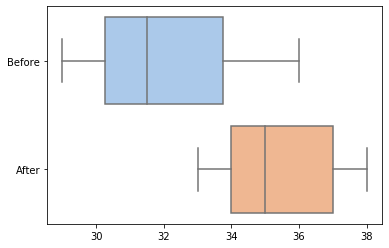

In [42]:
sns.boxplot(data=dataframe, 
            orient='h', 
            palette='pastel').set()

3. Написати функції:

3.1 Для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant).

In [43]:
def livena(data):
    n = data.shape[0]
    sum1 = 0
    sum2 = 0
    for i in range(n):
        sum1 += pow((data.iloc[i, 0] - (sum(data.iloc[:, 0])/n)), 2)
    for i in range(n):
        sum2 += pow((data.iloc[i, 1] - (sum(data.iloc[:, 1])/n)), 2)
        
    sigma1 = sqrt(sum1/n)
    sigma2 = sqrt(sum2/n)
    
    if sigma1 > sigma2:
        F = pow(sigma1, 2)/pow(sigma2, 2)
    else:
        F = pow(sigma2, 2)/pow(sigma1, 2)
    df = n-1
    
    print("Coef Livena:          " + str(F))
    print("Level of freedom:     " + str(df))
    table1 = pd.read_excel("tab1.xlsx").iloc[df, df]
    print("Critical val of coef: " + str(tab1))
    
    if F < tab1:
        result = "Significant"
    else:
        result = "Not significant"
    return result

3.2 Для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [50]:
def student(x, y):
    n=len(x)
    d=[]*n
    for i in range(n):
        d.append(x[i] - y[i])
    M=sum(d)/n
    L=0
    for i in range(n):
        L += ((M-d[i])**2)
    sigma = math.sqrt((L)/(n-1))
    tmp = M/(sigma/math.sqrt(n))
    print('Coef Studenta:        ' + str(tmp))
    r = n - 1
    print('Level of freedom:     ' + str(r))
    table2 = pd.read_excel("tab2.xlsx").iloc[r-1, 1 ]
    print("Critical val of coef: " + str(table2))
    if table2<tmp:
        result = "Significant"
    else:
        result = "Not significant"
    return result

3. Перевірити розбіжність на між групами на даних з п. 1.

In [51]:
livena(dataframe)

Coef Livena:          1.421511627906976
Level of freedom:     9
Critical val of coef: 3.18


'Significant'

In [52]:
student(dat1, dat2)

Coef Studenta:        -4.514011450616777
Level of freedom:     9
Critical val of coef: 2.262


'Not significant'